In [184]:
from ultralytics.models.yolo.segment import SegmentationPredictor
from ultralytics.utils import DEFAULT_CFG
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 添加配置文件和要预测的源

In [185]:
# 导入默认配置文件
cfg=DEFAULT_CFG
# 载入模型
model = 'best.pt'
# 添加预测源
source = "1.png"
# 选择cup还是gpu运行
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# 合并参数
args = dict(model=model, source=source, device=device, save=False, verbose=False)

## 预测

In [186]:
predictor = SegmentationPredictor(overrides=args)

In [187]:
results = predictor(source=source)

YOLOv8n-seg summary (fused): 195 layers, 3261769 parameters, 0 gradients, 12.0 GFLOPs


In [188]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'road', 1: 'sidewalk', 2: 'building', 3: 'wall', 4: 'fence', 5: 'pole', 6: 'traffic light', 7: 'traffic sign', 8: 'vegetation', 9: 'terrain', 10: 'sky', 11: 'person', 12: 'rider', 13: 'car', 14: 'truck', 15: 'bus', 16: 'train', 17: 'motorcycle', 18: 'bicycle'}
 orig_img: array([[[ 44,  54,  41],
         [ 41,  52,  37],
         [ 37,  46,  31],
         ...,
         [113, 111,  94],
         [117, 115,  97],
         [122, 121, 104]],
 
        [[ 46,  55,  41],
         [ 49,  57,  40],
         [ 45,  52,  33],
         ...,
         [114, 111,  95],
         [117, 115,  97],
         [121, 120, 102]],
 
        [[ 46,  53,  39],
         [ 50,  56,  42],
         [ 49,  55,  37],
         ...,
         [114, 111,  95],
         [119, 116,  99],
         [124, 122, 105]],
 
        ...,
 
        

## 解析目标检测的结果

In [189]:
# 预测框的所有类别（MS COCO数据集八十类）
results[0].names

{0: 'road',
 1: 'sidewalk',
 2: 'building',
 3: 'wall',
 4: 'fence',
 5: 'pole',
 6: 'traffic light',
 7: 'traffic sign',
 8: 'vegetation',
 9: 'terrain',
 10: 'sky',
 11: 'person',
 12: 'rider',
 13: 'car',
 14: 'truck',
 15: 'bus',
 16: 'train',
 17: 'motorcycle',
 18: 'bicycle'}

In [190]:
bbox_cls = results[0].boxes.cls.numpy().astype('uint32')

In [191]:
num_bbox = len(results[0].boxes)
print('预测出 {} 个框'.format(num_bbox))

预测出 32 个框


In [192]:
# 每个框的置信度
bboxes_conf = results[0].boxes.conf.numpy().astype('float32') # 检测框的置信度

In [193]:
# 每个框的：左上角XY坐标、右下角XY坐标
results[0].boxes.xyxy

tensor([[1.6165e-01, 3.5904e+02, 3.8953e+02, 7.8454e+02],
        [1.0801e+03, 4.1859e+02, 1.2564e+03, 5.4569e+02],
        [9.6941e+02, 2.4705e+01, 1.4993e+03, 4.5779e+02],
        [1.2649e+03, 4.2281e+02, 1.3756e+03, 5.1089e+02],
        [1.3606e+03, 4.6439e+02, 2.0462e+03, 7.0173e+02],
        [8.1697e+00, 7.5471e-01, 4.6117e+02, 3.4685e+02],
        [1.2326e+00, 4.0888e+02, 1.9973e+03, 1.0222e+03],
        [3.7295e+02, 4.0474e+02, 6.3816e+02, 5.4198e+02],
        [4.5856e+02, 9.5161e-01, 1.3387e+03, 1.9792e+02],
        [7.4188e+02, 2.9925e+02, 8.6635e+02, 4.2477e+02],
        [4.1737e+02, 2.7682e+02, 7.4041e+02, 5.2368e+02],
        [4.5417e+02, 1.8177e+00, 1.6497e+03, 2.1414e+02],
        [1.0063e+03, 2.6301e+02, 1.0476e+03, 3.3282e+02],
        [1.4092e+03, 9.7469e+00, 1.4310e+03, 4.7598e+02],
        [1.4118e+03, 4.0878e+02, 1.4459e+03, 4.8274e+02],
        [7.1062e+02, 4.0990e+01, 9.8682e+02, 4.3267e+02],
        [0.0000e+00, 3.6982e-01, 7.6603e+02, 5.4157e+02],
        [7.217

In [194]:
# 转成整数的 numpy array
bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

In [195]:
bboxes_xyxy

array([[   0,  359,  389,  784],
       [1080,  418, 1256,  545],
       [ 969,   24, 1499,  457],
       [1264,  422, 1375,  510],
       [1360,  464, 2046,  701],
       [   8,    0,  461,  346],
       [   1,  408, 1997, 1022],
       [ 372,  404,  638,  541],
       [ 458,    0, 1338,  197],
       [ 741,  299,  866,  424],
       [ 417,  276,  740,  523],
       [ 454,    1, 1649,  214],
       [1006,  263, 1047,  332],
       [1409,    9, 1430,  475],
       [1411,  408, 1445,  482],
       [ 710,   40,  986,  432],
       [   0,    0,  766,  541],
       [ 721,  409,  751,  465],
       [1883,   12, 1918,  606],
       [1587,   16, 1716,  196],
       [   3,    6, 2039,  561],
       [1515,  439, 1528,  524],
       [1417,  408, 1449,  477],
       [ 720,  302,  794,  413],
       [ 601,   33,  991,  438],
       [1408,    6, 1424,  480],
       [1020,  408, 1049,  473],
       [ 905,  400,  952,  470],
       [ 875,  347,  941,  395],
       [ 168,  390,  451,  568],
       [13

## 解析语义分割的结果

In [196]:
mask = results[0].masks

In [197]:
# 获取语义分割多个坐标点
ploy = mask.xy

## openCV可视化

In [198]:
img_bgr = cv2.imread(source)

<function matplotlib.pyplot.show(close=None, block=None)>

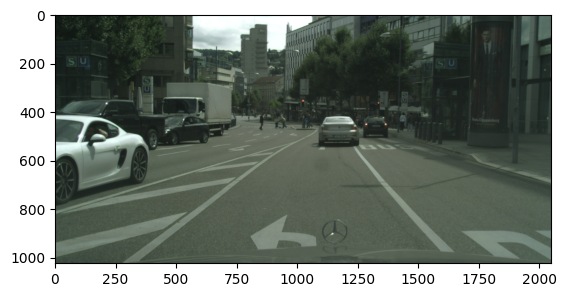

In [199]:
plt.imshow(img_bgr[:,:,::-1])
plt.show

In [200]:
# 框（rectangle）可视化配置
bbox_color = {
  0: (128, 64, 128),  #road
  1: (244, 35, 232),  #sidewalk
  2: (70, 70, 70),  #building
  3: (102, 102, 156),  #wall
  4: (190, 153, 153),  #fence
  5: (153, 153, 153),  #pole
  6: (250, 170, 30),  #traffic light
  7: (220, 220, 0),  #traffic sign
  8: (107, 142, 35),  #vegetation
  9: (152, 251, 152),  #terrain
  10: (70, 130, 180),  #sky
  11: (220, 20, 60),  #person
  12: (255, 0, 0),  #rider
  13: (0, 0, 142),  #car
  14: (0, 0, 70),  #truck
  15: (0, 60, 100),  #bus
  16: (0, 80, 100),  #train
  17: (0, 0, 230),  #motorcycle
  18: (119, 11, 32),  #bicycle
}            # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':2,         # 字体大小
    'font_thickness':2,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}


In [201]:
# 创建一个与原始图像同样大小的透明层 进行语义分割填充
pred_mask_bgr = np.zeros((img_bgr.shape[0], img_bgr.shape[1], 3))
pred_mask_bgr = pred_mask_bgr.astype('uint8')
for idx in range(num_bbox): # 遍历每个框
    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx]
    
    # 获取框的预测类别
    cls_idx = bbox_cls[idx]
    bbox_label = results[0].names[cls_idx]
    # 获取框的预测置信度
    bbox_conf = bboxes_conf[idx]
    
    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color[cls_idx], bbox_thickness)  
    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color[cls_idx], bbox_labelstr['font_thickness'])
    # 写框置信度
    img_bgr = cv2.putText(img_bgr, '{:.2f}'.format(bbox_conf), (bbox_xyxy[0]-bbox_labelstr['offset_x'], bbox_xyxy[1]-bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color[cls_idx], bbox_labelstr['font_thickness'])
    # 进行语义分割填充
    # pred_mask_bgr = cv2.fillPoly(pred_mask_bgr, [ploy[idx].astype('int32')], color=bbox_color[cls_idx])

# 混合原始图像和img_mask层
alpha = 0.4  # 设置透明度
img_bgr = cv2.addWeighted(pred_mask_bgr, alpha, img_bgr, 1 - alpha, 0)

<function matplotlib.pyplot.show(close=None, block=None)>

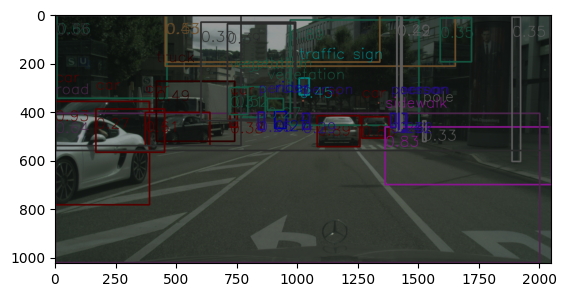

In [202]:
plt.imshow(img_bgr[:,:,::-1])
plt.show

list